# Railgun Model

Thomas Jagielski and Duncan  Mazza

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

import math

Assumptions:

    - Constant Current
    - Constant Force
    - The rails are made of iron
    - Projectile is a baseball
   


In [136]:
params = Params(mass_proj = 0.145, #kg
                rail_r = 0.01, #m
                rail_l = 3, #m
                arm_w = 0.9, #m
                arm_l = 0.01, #m
                arm_d = 0.02, #m
                w = 0.1, #m
                #mu = 1150, #T  
                mu = 10, 
                rho_cu = 8960, #g/m^3
                v_init = 0, #m/s
                y_init = 0, #m
                t_end = 1000
                )

,values
mass_proj,0.145
rail_r,0.010
rail_l,3.000
arm_w,0.900
arm_l,0.010
arm_d,0.020
w,0.100
mu,10.000
rho_cu,8960.000
v_init,0.000


In [150]:
def make_system(params):
    """Make a system object.
    
    params: 
    
    returns: System object
    """

    unpack(params)
    
    mass_arm = (arm_w * arm_l * arm_d) * rho_cu

    current = 1000
    
    lorentz_force = ((mu * current**2)/(2 * np.pi)) * (math.log((rail_r + w) / rail_r))
    B = ((mu * current)/(2 * np.pi * w)) * (math.log((rail_r + w) / rail_r))
    
    init = State(v=v_init, y=y_init)
    
    return System(params, lorentz_force=lorentz_force, mass_arm = mass_arm, B = B, init=init)

In [151]:
system = make_system(params);

In [152]:
def slope_func(state, t, system):
    
    unpack(system)
    v, y = state
    
    emf = -B * v * w   
    print(emf)
    dvdt = (lorentz_force + emf) / (mass_proj + mass_arm)
    dydt = v
        
    return dvdt, dydt

In [153]:
slope_func(system.init, 0, system)

-0.0


(376182.2431567763, 0.0)

In [154]:
def event_func(state, t, system):
    v, y = state
    return system.rail_l - y

In [155]:
results, details = run_ode_solver(system, slope_func, events = event_func, max_step=0.00001)
details

-0.0
-1435.650197274277
-2871.3003945485543
-4304.520294320635
-11467.951968748057
-12740.070075426438
-14329.576277542097
-14329.532495889302
-17190.051859082472
-18617.890368350116
-25754.425107284198
-27021.766721324646
-28605.304716060422
-28605.261098797055
-31455.03991077315
-32877.51723534272
-39987.25603020375
-41249.83908616895
-42827.43128268518
-42827.387829193976
-45666.46641809827
-47083.60268790825
-54166.64615091844
-55424.48851603116
-56996.157239347245
-56996.113949013285
-59824.53249156872
-61236.347760974604
-68292.7961265818
-69545.91560097781
-71111.68309228815
-71111.6399644988
-73929.43848657455
-75335.95273463264
-82365.90586092888
-83614.32017790868
-85174.20859489747
-85174.16562904244
-87981.38400622032
-89382.6171369704
-96386.17450710494
-97629.9013333849
-99183.93275053964
-99183.8899460109
-101980.56790414963
-103376.53974689671
-110353.80047048394
-111592.8574064462
-113141.05381537003
-113141.01117156184
-115927.1882873593
-117317.91859695423
-124268.98

-1530059.435415066
-1530918.6949560288
-1535213.3932178002
-1535976.0672642386
-1536929.025264476
-1536928.9990160246
-1538643.968613728
-1539500.0018450818
-1543778.5745643256
-1544538.3849560851
-1545487.764831895
-1545487.738682
-1547196.2689879313
-1548049.0880236803
-1552311.5957478678
-1553068.5532372724
-1554014.3684236377
-1554014.3423719292
-1555716.457564055
-1556566.074472718
-1560812.5775219807
-1561566.6928209816
-1562508.9567024396
-1562508.930748549
-1564204.6549140546
-1565051.0817188367
-1569281.6401868176
-1570032.923967145
-1570971.6498779785
-1570971.624021538
-1572660.9811571667
-1573504.229836128
-1577718.903590834
-1578467.3664841487
-1579402.5677085724
-1579402.541949217
-1581085.5559616096
-1581925.6384478363
-1586124.487132484
-1586870.1397305273
-1587801.8295028773
-1587801.8038402419
-1589478.4985462765
-1590315.4267280486
-1594498.509761909
-1595241.362616653
-1596169.5541215742
-1596169.528555296
-1597839.9276824235
-1598673.7134033833
-1602841.089982623
-

-2428011.159469456
-2428475.3384348266
-2429055.3280918202
-2429055.3121164776
-2430099.0775588984
-2430620.0768265515
-2433224.1033662707
-2433686.5394530515
-2434264.351390609
-2434264.33547525
-2435304.1818334875
-2435823.224876201
-2438417.473932579
-2438878.1736848545
-2439453.8160797795
-2439453.8002241785
-2440489.7422134355
-2441006.8363763564
-2443591.3446614537
-2444050.314598735
-2444623.79559713
-2444623.7798010632
-2445655.832081292
-2446170.9846819867
-2448745.7887700205
-2449203.0353873405
-2449774.363104721
-2449774.347367964
-2450802.5245440714
-2451315.7428726326
-2453880.8792004897
-2454336.4089684947
-2454905.5914899046
-2454905.5758122364
-2455929.8924342906
-2456441.183753438
-2458996.6886211964
-2459450.507986234
-2460017.5533663607
-2460017.5377475577
-2461038.008310997
-2461547.379856178
-2464093.2894276176
-2464545.4048118345
-2465110.321075121
-2465110.305514963
-2466126.944460796
-2466634.4034402953
-2469170.753743408
-2469621.1715448345
-2470183.966685595
-

-2923679.565531958
-2924015.0633361815
-2925691.92785492
-2925989.7138621975
-2926361.796220735
-2926361.78597203
-2927031.395684708
-2927365.6337766587
-2929036.2020788845
-2929332.869972471
-2929703.555252674
-2929703.5450424496
-2930370.6405342817
-2930703.623643871
-2932367.9193703393
-2932663.4733484793
-2933032.7667960343
-2933032.7566241473
-2933697.3473354173
-2934029.0801747977
-2935687.126877498
-2935981.5711226705
-2936349.4779635705
-2936349.467829876
-2937011.563165424
-2937342.0504290536
-2938993.8715715427
-2939287.210250525
-2939653.7356911376
-2939653.7255954933
-2940313.3349248446
-2940642.581289557
-2942288.2002472915
-2942580.437511214
-2942945.586738361
-2942945.576680623
-2943602.709338124
-2943930.71946319
-2945570.1595238596
-2945861.299508267
-2946225.077689294
-2946225.06766932
-2946879.7329542674
-2947206.5114814662
-2948839.7958453186
-2949129.842670227
-2949492.254953076
-2949492.244970725
-2950144.4521475
-2950470.00370118
-2952097.1554813534
-2952386.1132

-3273264.1549668945
-3274284.7288818057
-3274465.9675137023
-3274692.4244188834
-3274692.4181813127
-3275099.956296821
-3275303.3804102205
-3276320.1223194655
-3276500.680444587
-3276726.2870594263
-3276726.280845276
-3277132.2887547463
-3277334.949060308
-3278347.8733521337
-3278527.7535256157
-3278752.5130427447
-3278752.506851927
-3279156.9903009087
-3279358.8896665443
-3280368.0106751714
-3280547.2154425574
-3280771.1310426216
-3280771.124875048
-3281174.089587518
-3281375.2308703717
-3282380.5628761975
-3282559.0947734728
-3282782.1696251743
-3282782.1634807596
-3283183.6151592014
-3283384.0012056883
-3284385.558435494
-3284563.41998912
-3284785.6572492644
-3284785.6511279196
-3285185.595453407
-3285385.2290992555
-3286383.025726402
-3286560.2194533567
-3286781.622266894
-3286781.616168534
-3287180.058800809
-3287378.9428710993
-3288372.9930157308
-3288549.521423539
-3288770.0929236133
-3288770.086848151
-3289167.0334257046
-3289365.1707349103
-3290355.488464153
-3290531.354050926

,values
sol,None
t_events,[[0.005295688756131859]]
nfev,3182
njev,0
nlu,0
status,1
message,A termination event occurred.
success,True


In [156]:
results

,v,y
0.000000,0.000000,0.000000
0.000010,3.754756,0.000019
0.000020,7.495413,0.000075
0.000030,11.222025,0.000169
0.000040,14.934645,0.000299
0.000050,18.633325,0.000467
0.000060,22.318117,0.000672
0.000070,25.989073,0.000914
0.000080,29.646246,0.001192
0.000090,33.289688,0.001506


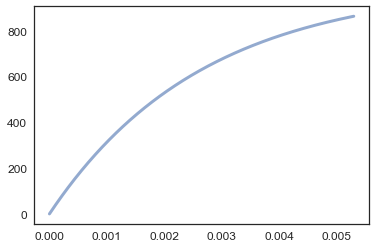

In [157]:
plot(results.v)